In [1]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt    
    

In [6]:
# Isolate data items
# Date Range A: Normal Operating Period 22nd Dec 2017 - 25th Jan 2018
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL', 'MCO']
Date_Range_A_Dates = ['20171222', '20171223', '20171224', '20171225','20180122', '20180123', '20180124', '20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]


Flight Counter: 1
Airline Flight#: DL295
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T11:07:00.000
Actual Departure: 2018-01-22T19:04:00.000
Flight Departure Delayed by (H:M:S): 7:57:00
Departure Time Delta (minutes): 477.0


Flight Counter: 2
Airline Flight#: DL1661
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:25:00.000
Actual Departure: 2018-01-22T13:54:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 3
Airline Flight#: DL2297
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 4
Airline Flight#: DL2472
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 5
Airline Flight#: DL2046
Airport: 

Flight Counter: 97
Airline Flight#: DL2439
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:29:00.000
Actual Departure: 2018-01-22T15:24:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 98
Airline Flight#: DL1307
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:30:00.000
Actual Departure: 2018-01-22T15:23:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 99
Airline Flight#: DL2568
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:30:00.000
Actual Departure: 2018-01-22T15:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 100
Airline Flight#: DL2111
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:30:00.000
Actual Departure: 2018-01-22T15:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 101
Airline Flight#

Flight Counter: 183
Airline Flight#: DL2174
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:27:00.000
Actual Departure: 2018-01-22T17:22:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 184
Airline Flight#: DL1825
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:28:00.000
Actual Departure: 2018-01-22T17:24:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 185
Airline Flight#: DL1198
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:29:00.000
Actual Departure: 2018-01-22T17:23:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 186
Airline Flight#: DL2784
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:30:00.000
Actual Departure: 2018-01-22T17:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 187
Airline Flight#: DL131
Airport: 

Flight Counter: 248
Airline Flight#: DL2016
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:05:00.000
Actual Departure: 2018-01-22T19:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 249
Airline Flight#: DL1940
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:05:00.000
Actual Departure: 2018-01-22T19:06:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 250
Airline Flight#: DL2117
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:06:00.000
Actual Departure: 2018-01-22T19:02:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 251
Airline Flight#: DL1094
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:07:00.000
Actual Departure: 2018-01-22T19:04:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 252
Airline Flight#: DL2614
Airpor


Flight Counter: 330
Airline Flight#: DL1398
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T13:59:00.000
Actual Departure: 2018-01-23T13:56:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 331
Airline Flight#: DL1271
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T13:59:00.000
Actual Departure: 2018-01-23T13:56:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 332
Airline Flight#: DL2393
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T13:52:00.000
Flight Departed Early by (H:M:S): 0:08:00
Departure Time Delta (minutes): -8.0


Flight Counter: 333
Airline Flight#: DL1862
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:00:00.000
Actual Departure: 2018-01-23T13:53:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 334
Airline Fli



Flight Counter: 407
Airline Flight#: DL1689
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:35:00.000
Actual Departure: 2018-01-23T15:30:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 408
Airline Flight#: DL2448
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:38:00.000
Actual Departure: 2018-01-23T16:06:00.000
Flight Departure Delayed by (H:M:S): 0:28:00
Departure Time Delta (minutes): 28.0


Flight Counter: 409
Airline Flight#: DL1238
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:42:00.000
Actual Departure: 2018-01-23T15:38:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 410
Airline Flight#: DL932
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:44:00.000
Actual Departure: 2018-01-23T15:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 411
Airline 

Flight Counter: 494
Airline Flight#: DL1934
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:45:00.000
No Gate Depature Delay Data
Delay (Minutes): 0
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 495
Airline Flight#: DL1834
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:45:00.000
Actual Departure: 2018-01-23T17:39:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 496
Airline Flight#: DL1408
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:50:00.000
Actual Departure: 2018-01-23T17:48:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 497
Airline Flight#: DL393
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:50:00.000
Actual Departure: 2018-01-23T17:43:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 498
Airline Flight#: DL14
Airpor

Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:40:00.000
Actual Departure: 2018-01-23T19:38:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 574
Airline Flight#: DL2078
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:41:00.000
Actual Departure: 2018-01-23T19:45:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 575
Airline Flight#: DL90
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:42:00.000
Actual Departure: 2018-01-23T19:35:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 576
Airline Flight#: DL1607
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:44:00.000
Actual Departure: 2018-01-23T19:59:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 577
Airline Flight#: DL2497
Airport: ATL
Date: 2018-01-23
Scheduled De

Flight Counter: 656
Airline Flight#: DL1615
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:00:00.000
Actual Departure: 2018-01-24T15:03:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 657
Airline Flight#: DL902
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:01:00.000
Actual Departure: 2018-01-24T15:02:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 658
Airline Flight#: DL2035
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:02:00.000
Actual Departure: 2018-01-24T15:00:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 659
Airline Flight#: DL1281
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:02:00.000
Actual Departure: 2018-01-24T15:00:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 660
Airline F



Flight Counter: 740
Airline Flight#: DL1774
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:35:00.000
Actual Departure: 2018-01-24T16:41:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 741
Airline Flight#: DL2445
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:42:00.000
Actual Departure: 2018-01-24T16:36:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 742
Airline Flight#: DL1705
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:44:00.000
Actual Departure: 2018-01-24T16:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 743
Airline Flight#: DL1623
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:39:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 744
Airline 

Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 829
Airline Flight#: DL1849
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:03:00.000
Actual Departure: 2018-01-24T19:00:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 830
Airline Flight#: DL1805
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:05:00.000
Actual Departure: 2018-01-24T19:00:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 831
Airline Flight#: DL2112
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:05:00.000
Actual Departure: 2018-01-24T19:04:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 832
Airline Flight#: DL1940
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:05:00.000
Actual Departure: 2018-01-24T19:05:00.000
Flight Departed On Time!
Departu

Flight Counter: 904
Airline Flight#: DL1690
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:52:00.000
Actual Departure: 2018-01-25T13:48:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 905
Airline Flight#: DL1513
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:52:00.000
Actual Departure: 2018-01-25T14:06:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 906
Airline Flight#: DL2234
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:52:00.000
Actual Departure: 2018-01-25T13:47:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 907
Airline Flight#: DL1701
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T13:53:00.000
Actual Departure: 2018-01-25T13:54:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 908
Airline

Flight Counter: 974
Airline Flight#: DL1998
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:10:00.000
Actual Departure: 2018-01-25T15:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 975
Airline Flight#: DL2059
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:11:00.000
Actual Departure: 2018-01-25T15:15:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 976
Airline Flight#: DL1871
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:11:00.000
Actual Departure: 2018-01-25T15:04:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 977
Airline Flight#: DL729
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:12:00.000
Actual Departure: 2018-01-25T15:06:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 978
Airline Fli

Flight Counter: 1053
Airline Flight#: DL29
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:55:00.000
Actual Departure: 2018-01-25T16:52:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1054
Airline Flight#: DL887
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:56:00.000
Actual Departure: 2018-01-25T16:55:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1055
Airline Flight#: DL359
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:57:00.000
Actual Departure: 2018-01-25T16:52:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1056
Airline Flight#: DL109
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:57:00.000
Actual Departure: 2018-01-25T17:03:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 1057
Airline Fl

Flight Counter: 1125
Airline Flight#: DL1205
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:30:00.000
Actual Departure: 2018-01-25T18:26:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1126
Airline Flight#: DL2501
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:33:00.000
Actual Departure: 2018-01-25T18:34:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1127
Airline Flight#: DL2493
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:34:00.000
Actual Departure: 2018-01-25T18:31:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1128
Airline Flight#: DL1510
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:38:00.000
Actual Departure: 2018-01-25T18:36:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1129
Airli

Flight Counter: 1196
Airline Flight#: DL2289
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:56:00.000
Actual Departure: 2018-01-25T19:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1197
Airline Flight#: DL1753
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:57:00.000
Actual Departure: 2018-01-25T19:53:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1198
Airline Flight#: DL2509
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:58:00.000
Actual Departure: 2018-01-25T19:58:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1199
Airline Flight#: DL2331
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:59:00.000
Actual Departure: 2018-01-25T20:04:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1200
Airline Flight#: DL2559
A

Flight Counter: 1281
Airline Flight#: DL1051
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:30:00.000
Actual Departure: 2018-01-25T16:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1282
Airline Flight#: DL2624
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:38:00.000
Actual Departure: 2018-01-25T16:41:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 1283
Airline Flight#: DL1652
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:40:00.000
Actual Departure: 2018-01-25T16:35:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1284
Airline Flight#: DL2628
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:24:00.000
Actual Departure: 2018-01-25T17:26:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1285
Airline Flight#: DL2109

In [7]:
# Summarize Date Range A
print(f"\nDeparture Summary for Date Range A\n")

Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()







Departure Summary for Date Range A

Total Departures Early: 874
Total Departures On Time: 107
Total Departures Delayed: 314
Total Departures: 1295



,Early,On Time,Delayed
0,874,107,314


In [8]:
# Describe Date Range A
Date_Range_A_df.describe()



,Delay
count,1295.000000
mean,2.808494
std,31.247634
min,-28.000000
25%,-4.000000
50%,-2.000000
75%,0.000000
max,759.000000


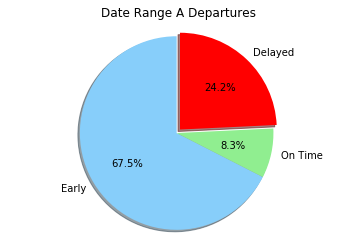

In [9]:
# Plot Date Range A Departures

Date_Range_A_Summary = [Sum_Early, Sum_On_Time, Sum_Delays]
Date_Range_A_Labels = ["Early", "On Time", "Delayed"]
colors = ["lightskyblue", "lightgreen", "red"]
explode = (0, 0, 0.05)

plt.title("Date Range A Departures")
plt.pie(Date_Range_A_Summary, autopct="%1.1f%%", explode=explode, labels=Date_Range_A_Labels, colors=colors, shadow=True, startangle=90)
plt.axis("equal")
plt.show()


In [227]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B